## Visualization
- 목표 : 사망 환자와 퇴원 환자에서 D-10 ~ D-1의 feature 분포 시각화

In [270]:
import numpy as np, os
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 필요한 데이터 로드

In [273]:
path = '/project/guri/'
X = np.load('/project/LSH/x_(7727,10,4068).npy')
# 컬럼이름 로드
COLS = list(pd.read_csv('/project/LSH/total_data_7727.csv')['ITEMID'].sort_values().unique())
#Reverse FI
fi = pd.read_csv(path + 'Restart/data/reverse_FI2.csv')

In [274]:
# cols = pd.read_csv(path + 'data/data2d_forposter.csv').columns

In [275]:
COLS[-10:]

[74300000533,
 74312000660,
 74312001370,
 76329301205,
 76336045517,
 78112001103,
 79511050204,
 87701071218,
 87701083336,
 87701089415]

In [276]:
fi

,feature,bce
0,409606211,1.073542
1,74606211,1.051030
2,67434504,1.046829
3,54817525,1.043492
4,10019055302,1.041859
...,...,...
4064,55390000401,1.010688
4065,0,1.009931
4066,51277,1.006995
4067,63323026201,1.006389


# 사망/퇴원 환자 split

In [277]:
#death_index
d_index = np.where(y==1)[0]
#survive_index (퇴원 환자)
s_index = np.where(y==0)[0]

In [278]:
#사망/퇴원 환자 분리
d_X = X[d_index]
s_X = X[s_index]
d_X.shape, s_X.shape

((4718, 10, 4068), (3009, 10, 4068))

# 사망/퇴원 환자별 각 feature의 합 DF 생성

In [279]:
s_X[:,:,835].sum()

24.0

In [280]:
s_index

array([   3,   16,   18, ..., 7722, 7723, 7726])

In [281]:
COLS[2195]

409606211

In [282]:
result = []
result_s = []
#day - 10일
for d in range(10):
    #4068 - ITEM
    for f in range(d_X.shape[-1]):
        d_sum = d_X[:,d,f].sum()/d_X.shape[0]
        s_sum = s_X[:,d,f].sum()/s_X.shape[0]
        result.append({'cols':COLS[f], 'day':10-d,'per':d_sum})
        result_s.append({'cols':COLS[f], 'day':10-d,'per':s_sum})

In [283]:
d_df = pd.DataFrame(result).sort_values(['cols','day']).reset_index(drop=True)
s_df = pd.DataFrame(result_s).sort_values(['cols','day']).reset_index(drop=True)
d_df.shape, s_df.shape

((40680, 3), (40680, 3))

# FI 상위 feature만 visualization

In [284]:
#상위 10개 feature 추출
top_fi = fi[:10]['feature'].to_list()
top_fi

['409606211',
 '74606211',
 '67434504',
 '54817525',
 '10019055302',
 '227194',
 '54858516',
 '74706811',
 '45006701',
 '4003822']

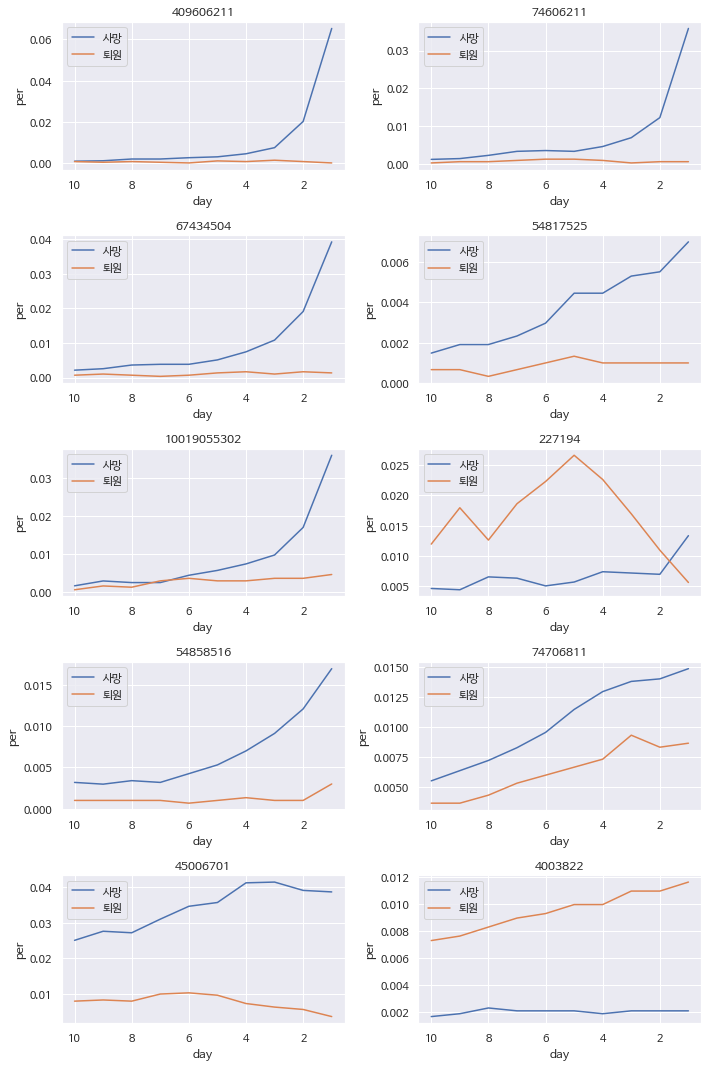

In [285]:
plt.figure(figsize=(10,15))
for i, f in enumerate(top_fi):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(x = 'day', y='per', data = d_df[d_df['cols']==int(f)], label='사망')
    ax = sns.lineplot(x = 'day', y='per', data = s_df[s_df['cols']==int(f)], label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

# PRE, PRO, LAB 각 Top10

In [286]:
merge_data = pd.read_csv(path + 'data/merge_data.csv')[['ITEM','Type']]

In [287]:
merge_data

,ITEM,Type
0,50882,LAB
1,50931,LAB
2,50971,LAB
3,51275,LAB
4,51288,LAB
...,...,...
9221915,51288,LAB
9221916,51279,LAB
9221917,51006,LAB
9221918,51221,LAB


In [288]:
merge_data = merge_data.drop_duplicates().rename(columns = {'ITEM':'feature'})
merge_data['feature'] = merge_data['feature'].astype('str')

In [289]:
merge_data.head(2)

,feature,Type
0,50882,LAB
1,50931,LAB


In [290]:
fi_type = pd.merge(fi, merge_data, how='left', on='feature')
fi_type

,feature,bce,Type
0,409606211,1.073542,PRE
1,74606211,1.051030,PRE
2,67434504,1.046829,PRE
3,54817525,1.043492,PRE
4,10019055302,1.041859,PRE
...,...,...,...
4064,55390000401,1.010688,PRE
4065,0,1.009931,PRE
4066,51277,1.006995,LAB
4067,63323026201,1.006389,PRE


## PRE

In [291]:
pre_top10 = fi_type[fi_type['Type']=='PRE'][:10].feature.to_list()
pre_top10

['409606211',
 '74606211',
 '67434504',
 '54817525',
 '10019055302',
 '54858516',
 '74706811',
 '45006701',
 '4003822',
 '63323016501']

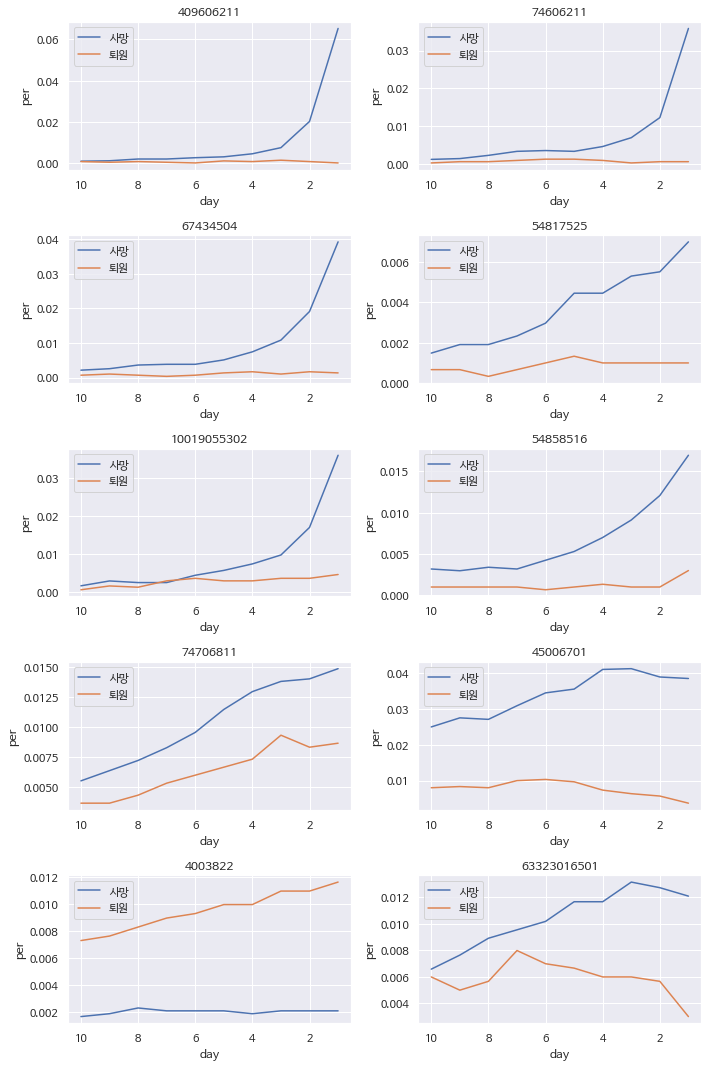

In [292]:
plt.figure(figsize=(10,15))
for i, f in enumerate(pre_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==int(f)], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==int(f)], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

## PRO

In [293]:
pro_top10 = fi_type[fi_type['Type']=='PRO'][:10].feature.to_list()
pro_top10

['227194',
 '228125',
 '224270',
 '225202',
 '228127',
 '228128',
 '226124',
 '224277',
 '225450',
 '225816']

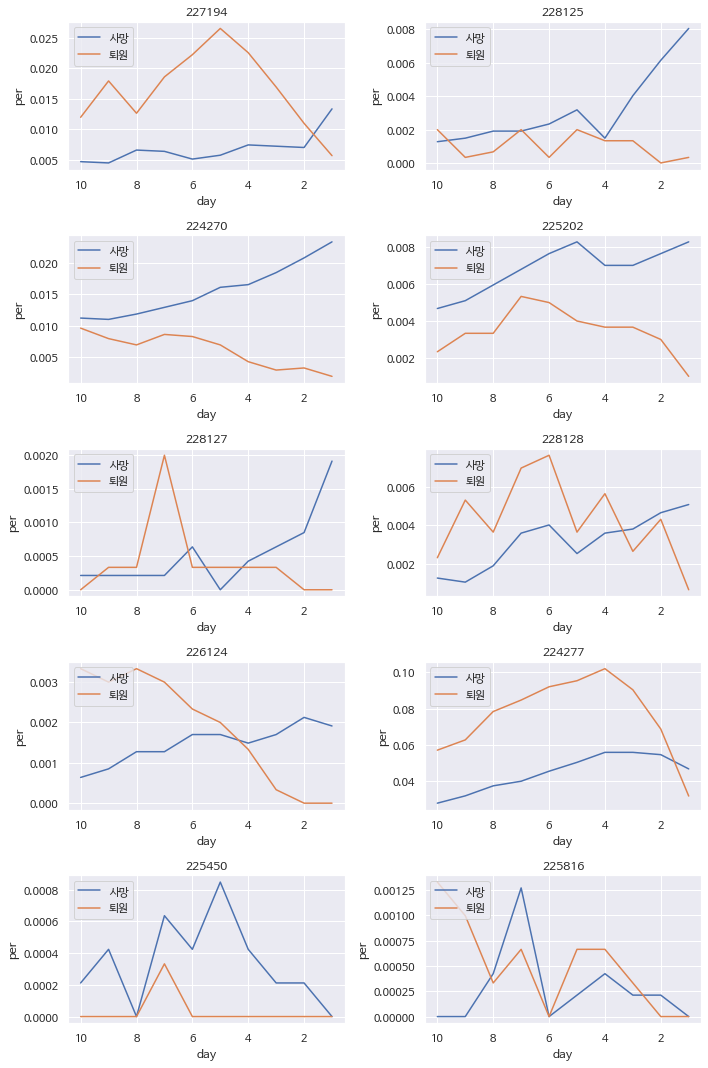

In [294]:
plt.figure(figsize=(10,15))
for i, f in enumerate(pro_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==int(f)], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==int(f)], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

## LAB
**['50927', '51148', '51128', '51116', '51127', '51479', '51120', '51213', '51302', '50990']**
- ITEMID : LABEL / LONIC_CODE
  - 50927 : Gamma Glutamyltransferase / [2324-2](https://loinc.org/2324-2/)
  - 51148 : Blasts / [708-8](https://loinc.org/708-8/)
    -  The presence of blasts in the peripheral blood is a marker for hematologic malignancy. \
    (말초혈에 폭발이 있다는 것은 혈액학적 악성종양의 표식이다.)
  - 51128 : WBC, Ascites / [26468-9](https://loinc.org/26468-9/)
    - 백혈구 또는 백혈구(WBC)는 감염, 신엽 및 기타 염증 조건과 싸우고 알레르기 반응을 중재하는 면역세포다.
  - 51116 : Lymphocytes / [26482-0](https://loinc.org/26482-0/)
    - 림프 조직에서 형성된 백혈구
  - 51127 : RBC, Ascites / [26457-2](https://loinc.org/26457-2/)
    - 복막 유체의 적혈구
  - 51479 : Granular Casts / [5793-5](https://loinc.org/5793-5/)
    - 현미경 저전력장치에 의한 소변 침전물 내 미세 주조물
  - 51120 : Monocytes / [26488-7](https://loinc.org/26488-7/)
    - 단핵세포는 면역반응의 초기화에 밀접하게 관여하는 단핵 백혈구
  - 51213 : Fibrin Degradation Products / [30226-5](https://loinc.org/30226-5/)
    - 혈소판 불량 혈장 내 피브린+피브리노겐 파편
  - 51302 : Young Cells / [51633-6](https://loinc.org/51633-6/)
  - 50990 : Theophylline / [4049-3](https://loinc.org/4049-3/)

['50889', '51200', '51003', '51148', '50868', '50813', '50856', '51362', '51120', '50908']


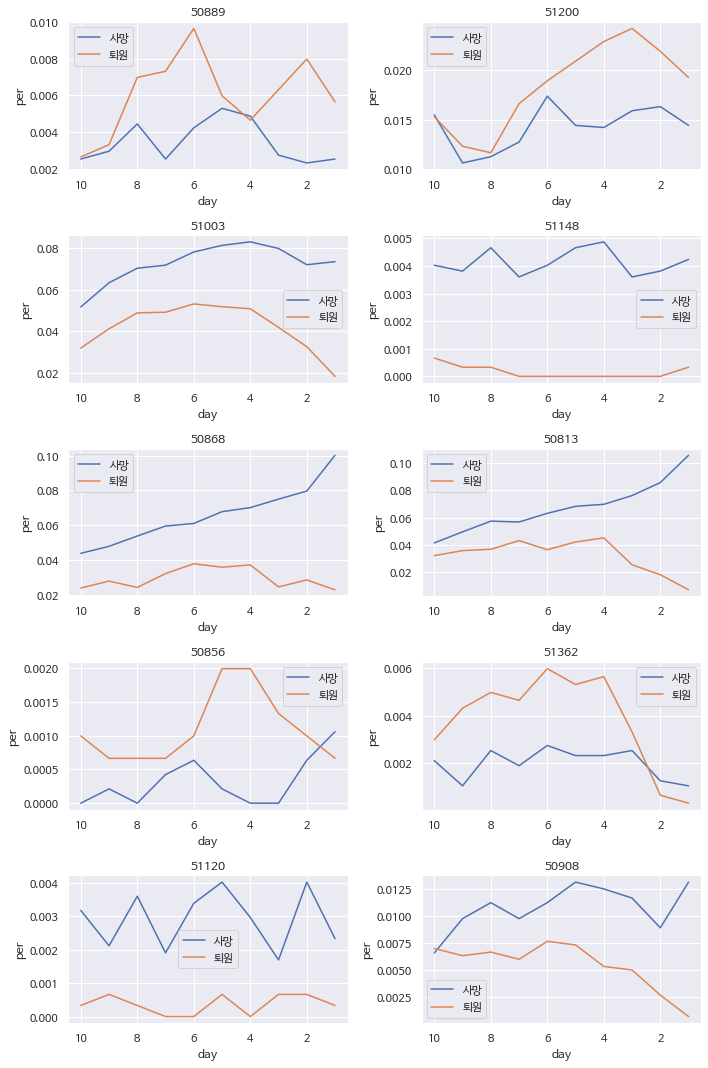

In [295]:
lab_top10 = fi_type[fi_type['Type']=='LAB'][:10].feature.to_list()
print(lab_top10)

plt.figure(figsize=(10,15))
for i, f in enumerate(lab_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==int(f)], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==int(f)], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
plt.tight_layout()